## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## Read in cleaned df

In [2]:
df = pd.read_pickle("outputs/df_cleaned.pickle")

In [3]:
features = df.iloc[:, :-1]
response = df.iloc[:, -1]
le = LabelEncoder().fit(response)
features_scaled = StandardScaler().fit_transform(features)
response_tf = le.transform(response)

## Training and Testing set splits

In [4]:
X_train, x_test, y_train, y_test = train_test_split(
    features_scaled,
    response_tf,
    test_size=0.2,
    random_state=42
)

## Classifier

In [5]:
# Let's implement K-Fold CV

model = GradientBoostingClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=42)
results = cross_val_score(model, features_scaled, response_tf, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accuracy: 76.42% (0.27%)


## Validation

In [6]:
model.fit(X_train, y_train)
pred = model.predict(x_test)

In [7]:
score = model.score(x_test, y_test)

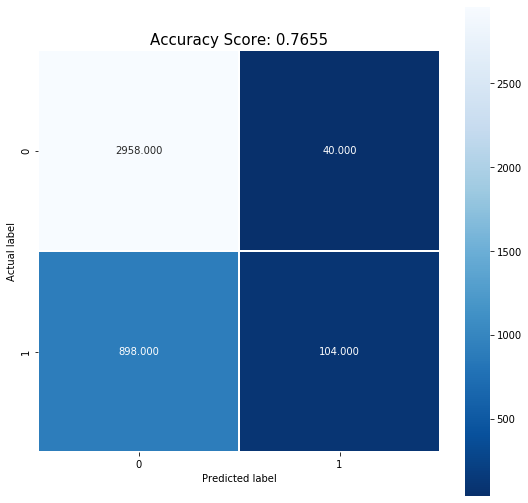

In [8]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

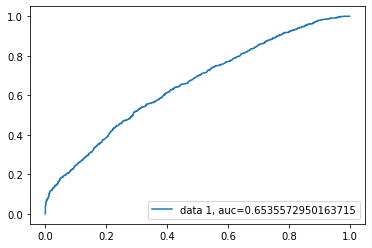

In [9]:
# First iteration

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
# Feature importances
feature_importance = pd.DataFrame(
    list(
        zip(features.columns, model.feature_importances_)
    )
)
feature_importance.columns = ["feature", "score"]
feature_importance.sort_values("score", ascending=False)

,feature,score
4,distance_covered,0.278370
2,max_gyro,0.239414
0,Speed,0.196502
1,max_acceleration,0.151793
3,Bearing_diffs,0.133922


## Grid Search